# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Add today's date
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=hermanus
Processing Record 2 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=lebu
Processing Record 3 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=busselton
Processing Record 4 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=jamestown
Processing Record 5 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=cidreira
Processing Record 6 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=kodiak
Processing Record 7 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 57 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=tessalit
Processing Record 58 | Nortelandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=nortelandia
Processing Record 59 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=hobart
Processing Record 60 | Aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=aswan
Processing Record 61 | East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=east london
Processing Record 62 | Viedma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=viedma
Processing Record 63 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=n

Processing Record 113 | Parana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=parana
City not found. Skipping...
Processing Record 114 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=constitucion
Processing Record 115 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=lagoa
Processing Record 116 | Huanuco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=huanuco
Processing Record 117 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=saint-pierre
Processing Record 118 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=mar del plata
Processing Record 119 | Eufaula
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 169 | Raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=raudeberg
Processing Record 170 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=vardo
Processing Record 171 | Buin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=buin
Processing Record 172 | Yichang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=yichang
Processing Record 173 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=la ronge
Processing Record 174 | Humaita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=humaita
Processing Record 175 | Juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=juneau
Proce

Processing Record 225 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=saint george
City not found. Skipping...
Processing Record 226 | Suruc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=suruc
Processing Record 227 | Uribia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=uribia
Processing Record 228 | Qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=qaqortoq
Processing Record 229 | Salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=salalah
Processing Record 230 | Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=acapulco
City not found. Skipping...
Processing Record 231 | Jiayuguan
http://api.openweathermap.org/data/2.5/weath

Processing Record 280 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=shimoda
Processing Record 281 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=mecca
Processing Record 282 | Lafiagi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=lafiagi
Processing Record 283 | Klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=klaksvik
Processing Record 284 | Soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=soyo
Processing Record 285 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=bereda
Processing Record 286 | San Pedro de Macoris
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=san 

Processing Record 335 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=evensk
Processing Record 336 | Blois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=blois
Processing Record 337 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=ilulissat
Processing Record 338 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=saint-augustin
City not found. Skipping...
Processing Record 339 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=pacific grove
Processing Record 340 | Tres Passos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=tres passos
Processing Record 341 | Tautira
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 390 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=nelson bay
Processing Record 391 | Irun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=irun
Processing Record 392 | Nakhon Thai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=nakhon thai
City not found. Skipping...
Processing Record 393 | Abu Kamal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=abu kamal
City not found. Skipping...
Processing Record 394 | Gazanjyk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=gazanjyk
Processing Record 395 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=alofi
Processing Record 396 | Shyroke
http://api.openweathermap.org/data/2.5/weath

Processing Record 445 | Dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=dakar
Processing Record 446 | Gilroy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=gilroy
Processing Record 447 | Kant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=kant
Processing Record 448 | Jalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=jalu
Processing Record 449 | Walvis Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=walvis bay
Processing Record 450 | Jieshou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=jieshou
Processing Record 451 | Inca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=inca
Processing Record

Processing Record 500 | Tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=tocopilla
Processing Record 501 | Huangmei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=huangmei
Processing Record 502 | Uyuni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=uyuni
Processing Record 503 | Ughelli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=ughelli
Processing Record 504 | Aras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=aras
Processing Record 505 | Kiunga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=kiunga
Processing Record 506 | Atasu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6741826e57a29058c6c5148f928138f6&q=atasu
Processin

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

In [6]:
# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,26,ZA,1555722083,85,-34.42,19.24,59.00,19.35
1,Lebu,67,ET,1555722586,84,8.96,38.73,57.19,2.73
2,Busselton,80,AU,1555722323,93,-33.64,115.35,51.01,18.16
3,Jamestown,0,AU,1555722589,17,-33.21,138.60,82.53,18.03
4,Cidreira,39,BR,1555722590,77,-30.17,-50.22,70.56,4.27


In [7]:
# Save data frame to CSV
weather_data.to_csv("cities.csv", encoding='utf-8', index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

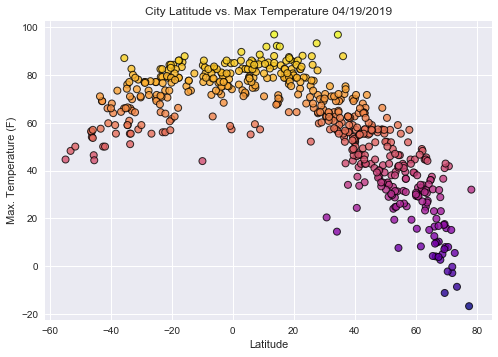

<Figure size 576x396 with 0 Axes>

In [49]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], 
            weather_data["Max Temp"], c=weather_data["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()
          
# Save the figure
plt.savefig("Latitute_vs_Max Temp.png")

#### Latitude vs. Humidity Plot

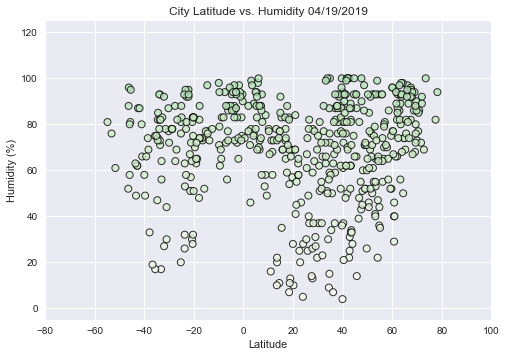

<Figure size 576x396 with 0 Axes>

In [48]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], 
            weather_data["Humidity"], c=weather_data["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='GnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 125])

# Show plot
plt.show()
          
# Save the figure
plt.savefig("Latitute_vs_Humidity.png")

#### Latitude vs. Cloudiness Plot

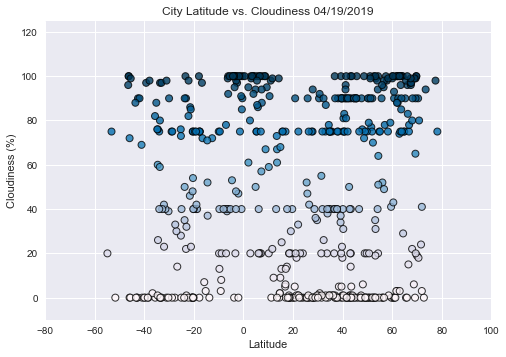

<Figure size 576x396 with 0 Axes>

In [47]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

plt.scatter(weather_data["Lat"], 
            weather_data["Cloudiness"], c=weather_data["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            cmap='PuBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

# Show plot
plt.show()
          
# Save the figure
plt.savefig("Latitute_vs_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

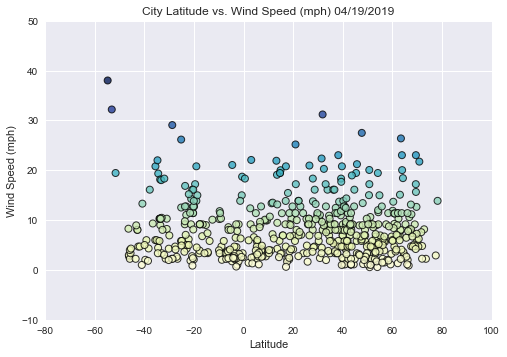

<Figure size 576x396 with 0 Axes>

In [46]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

plt.scatter(weather_data["Lat"], 
            weather_data["Wind Speed"], c=weather_data["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='YlGnBu', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

# Show plot
plt.show()
          
# Save the figure
plt.savefig("Latitute_vs_WindSpeed.png")